In [1]:
#to process text data import this lib
import xmltodict

In [2]:
#get text data and verify that it is working properly
xml = 'RawDataFolder/sms-20180303224019.xml'
#with open(xml, 'rb') as xmldoc:
xmldoc = open(xml, 'rb')
raw_texts = xmltodict.parse(xmldoc)
#print(raw_texts['smses'].keys())
#for text in raw_texts['smses']['sms'][:3]:
#    print(text)

In [3]:
#set up libs and options
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from six.moves import range

# Setup Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

test Myers Briggs data

In [4]:
#import redit posting data
import pandas as pd
reddit_text = pd.read_csv('RawDataFolder/Reddit_mbti_data_2.csv',encoding='utf-8').set_index('Name')

In [5]:
reddit_text_filler = pd.read_csv('RawDataFolder/Reddit_mbti_data_filler.csv',encoding='utf-8').set_index('Name')

In [6]:
#import mbti data from kaggle
Meyers_text = pd.read_csv('RawDataFolder/mbti_1.csv')

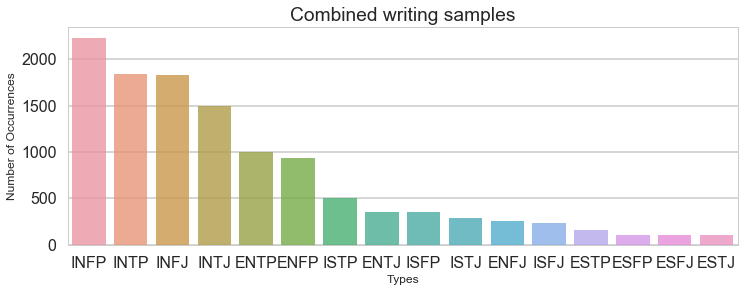

In [7]:
#check distribution of all the collected types
import matplotlib.pyplot as plt
import seaborn as sns

combined_sample = pd.concat([pd.concat([reddit_text.mbti, Meyers_text.type], ignore_index=True), reddit_text_filler.mbti], ignore_index=True)
cnt_srs = combined_sample.value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.title('Combined writing samples')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

In [8]:
combined_sample = pd.concat([pd.concat([reddit_text.mbti, Meyers_text.type], ignore_index=True), reddit_text_filler.mbti], ignore_index=True)
cnt_srs = combined_sample.value_counts()
print('Combined users: ')
print(cnt_srs)

Combined users: 
INFP    2237
INTP    1844
INFJ    1836
INTJ    1500
ENTP    1005
ENFP     933
ISTP     498
ENTJ     350
ISFP     350
ISTJ     282
ENFJ     256
ISFJ     238
ESTP     160
ESFP     102
ESFJ     102
ESTJ     101
dtype: int64


In [9]:
cnt_srs = reddit_text[reddit_text.text_count<40].mbti.value_counts()
print('Combined users: ')
print(cnt_srs)

Combined users: 
INTP    83
INTJ    73
INFJ    65
INFP    64
ENTP    44
ENFP    40
ISTP    31
ENTJ    23
ISFJ    21
ISFP    15
ENFJ    14
ESTP    12
ESFP    10
ISTJ     9
ESTJ     8
ESFJ     8
Name: mbti, dtype: int64


In [10]:
print(reddit_text.drop('text', axis=1)[reddit_text.text_count<50])

                      mbti  text_count
Name                                  
sweetsleeper          INTP        37.0
CleanDevelopment      ISTP        15.0
FunEquivalent         ISFP        34.0
Ayumu916              INFP        29.0
anacmelo              INTJ        25.0
suzythecreator        ISTP        28.0
magdaUl               ENTP         5.0
TheBureaucratJosephK  INTJ        40.0
analysis_god          INTP        34.0
PM-me-ur-MBTI-quirk   INFJ         7.0
Pos_Ki                INTJ        23.0
SousanTheMage         INTP        36.0
EffectiveEdge         ENFP         9.0
dashing-rainbows      ISTJ        29.0
Blissnoir             ISFJ        21.0
lle-ell               ENTP        47.0
IdealisticDegenerate  ENFP        17.0
TRlLLS                ENTJ        18.0
Plaid_Warlock         INTJ         8.0
arcticsehnsucht       INFP        39.0
taco-kat              INFP        49.0
jerompe               ENFP         9.0
pariah_piranha        INFP        28.0
Struggling_Millenial  EST

In [60]:
# ##COMPARISON/TEST
# ##test excluding reddit data to test influence skip next box if using it
# combined_data = Meyers_text.rename(index=str, columns={"type": "mbti", "posts": "text"})

In [110]:
Meyers_text = Meyers_text.rename(index=str, columns={"type": "mbti", "posts": "text"})
combined_data = reddit_text.append([Meyers_text, reddit_text_filler], ignore_index=True).fillna(50)

In [111]:
from sklearn.utils import shuffle
even = False
if even==True:
    #randomly select 100 examples of each
    combined_data_evened = shuffle(combined_data.groupby('mbti').apply(lambda x: x.sample(100)).reset_index(drop=True))
else:
    combined_data_evened = combined_data
    

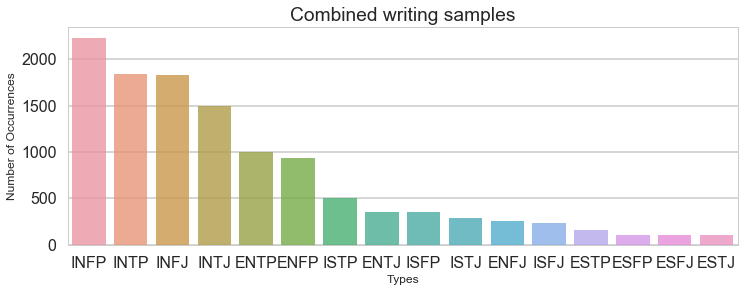

In [112]:
#check distribution of all the collected types
import matplotlib.pyplot as plt
import seaborn as sns

cnt_srs = combined_data_evened.mbti.value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.title('Combined writing samples')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

In [113]:
#split the data into test and training groups via mask
from sklearn.model_selection import train_test_split
_, itest_mbti = train_test_split(range(len(combined_data_evened['text'])), train_size=.66,stratify=combined_data_evened.mbti)
mask_mbti = np.zeros(len(combined_data_evened['text']), dtype=np.bool)
mask_mbti[itest_mbti] = True
mask_mbti = ~mask_mbti

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [114]:
#create arrays for results
y_IE = (combined_data_evened.mbti.str.contains('I') == 1).values.astype(np.int)
y_NS = (combined_data_evened.mbti.str.contains('N') == 1).values.astype(np.int)
y_TF = (combined_data_evened.mbti.str.contains('F') == 1).values.astype(np.int)
y_JP = (combined_data_evened.mbti.str.contains('J') == 1).values.astype(np.int)

In [115]:
#create one true results dataframe
y = pd.concat([pd.DataFrame(y_IE),pd.DataFrame(y_NS),pd.DataFrame(y_TF),pd.DataFrame(y_JP)], \
              keys = ['y_IE','y_NS','y_TF','y_JP'],axis=1)

print(combined_data_evened.mbti[:5])
print(y[:5])

0    ENTP
1    INTJ
2    ISTP
3    ENTP
4    ENTP
Name: mbti, dtype: object
  y_IE y_NS y_TF y_JP
     0    0    0    0
0    0    1    0    0
1    1    1    0    1
2    1    0    0    0
3    0    1    0    0
4    0    1    0    0


In [192]:
skjdfokds = 'test texting lsafjd 123 sdlkj'
print(skjdfokds.split(' '))
skjdfokds = ' '.join([ps.stem(word) for word in skjdfokds.split(' ')])
print(skjdfokds)

['test', 'texting', 'lsafjd', '123', 'sdlkj']
test
test text lsafjd 123 sdlkj


In [226]:
#preprocess all the mbti data
import re
from nltk.stem import PorterStemmer
ps = PorterStemmer()

elim_mbti_type=True

#add a removal of all mtbi classes                                                 <-change
def cleanText(text):
    
    text = str(text).lower()
    text = re.sub(r"'", r'', text)
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = re.sub(r'nbsp', r'', text)
    text = re.sub(r'\d[w]\d', r'', text)#\\dw\\d #7w8
    if (elim_mbti_type==True):
        text = re.sub(r'intp', r'<MBTI>', text)
        text = re.sub(r'intj', r'<MBTI>', text)
        text = re.sub(r'infj', r'<MBTI>', text)
        text = re.sub(r'infp', r'<MBTI>', text)
        text = re.sub(r'entp', r'<MBTI>', text)
        text = re.sub(r'enfp', r'<MBTI>', text)
        text = re.sub(r'istp', r'<MBTI>', text)
        text = re.sub(r'entj', r'<MBTI>', text)
        text = re.sub(r'isfj', r'<MBTI>', text)
        text = re.sub(r'enfj', r'<MBTI>', text)
        text = re.sub(r'isfp', r'<MBTI>', text)
        text = re.sub(r'esfp', r'<MBTI>', text)
        text = re.sub(r'estp', r'<MBTI>', text)
        text = re.sub(r'estj', r'<MBTI>', text)
        text = re.sub(r'esfj', r'<MBTI>', text)
        text = re.sub(r'istj', r'<MBTI>', text)
        
    #stemming improved the first two classifiers but made the second two worse -> it is a wash that slows down cleaning
#     text = ' '.join([ps.stem(word) for word in text.split(' ')])
    
    return text

combined_data_evened['clean_text'] = combined_data_evened['text'].apply(cleanText)
print(combined_data_evened['clean_text'][0])
print('done')

si is if in french.   ok.   i kind of get their point, and why are you upset about this?   i think this depends on the person and how much confidence they have when making decisions, if i understand your question properly.   as for me, i tend to imagine how different my life could have been if i did stuff differently, so i try to avoid the negative feelings by looking for the silver lining in my current situation.    why are you getting worked up over this?its a natural process that occurs in our brains, this is what makes us creative, open-minded, able to come up with our brilliant ideas.  its not a waste of time, just because you dont get it, doesnt mean you can call it useless. by looking beyond the object, you can improve it. to me, it seems rather boring to just look at what it is.    moderately nefarious.   scored high on machiavellianism, midrange on naracissm and low on psychopathy.     7 billion people on earth, many of them are <MBTI>s. so no, its not just you.   for once i a

____________________________________________________________________________

In [227]:
#initialized text processing libs and vars
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer_mtbi = TfidfVectorizer(ngram_range=(1, 1), 
                         stop_words='english',
                         lowercase = True, 
                         max_features = 5000)
#vectorizer_mtbi = CountVectorizer(min_df=10,stop_words=‘english’)

In [228]:
#texts from http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ only using ham messages for normalization
NormalTexts = open('rawDataFolder\otherTextsForNormalizing\SMSSpamCollection.txt', 'rb')
notSpamNormTexts = [str(text).split('\\t')[1].strip("\\n'") for text in NormalTexts.readlines() if (str(text).split('\\t')[0] != 'b"spam')]
notSpamNormTextsdf = pd.Series(notSpamNormTexts)
raw_text_series_Norm = notSpamNormTextsdf.apply(cleanText)
#print(type(raw_text_series_Norm))

#find all my text
raw_text_me = []
for message in raw_texts['smses']['sms']:
    #only include texts that you have sent
    if ((int(message['@type'])==2) and (message['@body'] != '')):
        raw_text_me.append(message['@body']) 
raw_text_series_me = pd.Series(raw_text_me).drop_duplicates(keep='first').reset_index(drop=True)
#print(type(raw_text_series_me))


#create a list of all the people who have texted me
People = []
for text in raw_texts['smses']['sms']:
    if ((text['@contact_name'] not in People) and int(text['@type'])!=2):
        People.append(text['@contact_name'])
        #print(text)
#print(People)
#collect all the texts from each of my contacts
from collections import defaultdict
raw_text_friends = defaultdict(list)
for person in People:
    for message in raw_texts['smses']['sms']:
        #only include texts that you have sent
        if ((int(message['@type'])!=2) and (message['@contact_name']==person) and (message['@body'] != '')):
            raw_text_friends[person].append(message['@body']) 
#print(raw_text_friends)
raw_text_series_friend = pd.Series(raw_text_friends)
postings_raw = list(raw_text_friends.values())
import itertools
postings = np.array(list(itertools.chain.from_iterable(postings_raw)))
#print(type(pd.Series(postings)))


#print(type(combined_data_evened['clean_text']))


In [229]:
all_texts_and_posts = combined_data_evened['clean_text'].append(raw_text_series_Norm).append(raw_text_series_me).append(pd.Series(postings))

In [230]:
#preform the data split

vectorizer_mtbi.fit(all_texts_and_posts)
#vectorizer_mtbi.fit(combined_data_evened['clean_text'])
X = vectorizer_mtbi.transform(combined_data_evened['clean_text'])

xtrain=X[mask_mbti]
ytrain=y[mask_mbti]
xtest=X[~mask_mbti]
ytest=y[~mask_mbti]

from sklearn.metrics import classification_report

In [231]:
#vectorizer_mtbi.vocabulary_

______________________________________________________________________________________

In [232]:
wei_cat1 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='ENFJ')
wei_cat2 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='ENFP')
wei_cat3 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='ENTJ')
wei_cat4 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='ENTP')
wei_cat5 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='ESFJ')
wei_cat6 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='ESFP')
wei_cat7 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='ESTJ')
wei_cat8 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='ESTP')
wei_cat9 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='INFJ')
wei_cat10 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='INFP')
wei_cat11 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='INTJ')
wei_cat12 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='INTP')
wei_cat13 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='ISFJ')
wei_cat14 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='ISFP')
wei_cat15 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='ISTJ')
wei_cat16 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='ISTP')
sample_size = len(ytrain)
inverseWeight_net = np.ravel( \
    (wei_cat1/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='ENFJ')+ \
    (wei_cat2/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='ENFP')+ \
    (wei_cat3/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='ENTJ')+ \
    (wei_cat4/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='ENTP')+ \
    (wei_cat5/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='ESFJ')+ \
    (wei_cat6/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='ESFP')+ \
    (wei_cat7/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='ESTJ')+ \
    (wei_cat8/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='ESTP')+ \
    (wei_cat9/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='INFJ')+ \
    (wei_cat10/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='INFP')+ \
    (wei_cat11/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='INTJ')+ \
    (wei_cat12/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='INTP')+ \
    (wei_cat13/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='ISFJ')+ \
    (wei_cat14/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='ISFP')+ \
    (wei_cat15/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='ISTJ')+ \
    (wei_cat16/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='ISTP'))
#print(inverseWeight_net[:5])

In [233]:
#check accuracy of each model on the saved training data
clf_cumulative = MultinomialNB(alpha=1).fit(xtrain, combined_data_evened.mbti[mask_mbti],sample_weight=inverseWeight_net)

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf_cumulative.score(xtrain, combined_data_evened.mbti[mask_mbti])
test_accuracy = clf_cumulative.score(xtest, combined_data_evened.mbti[~mask_mbti])
from sklearn.metrics import precision_recall_fscore_support

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Training report: \n", classification_report(combined_data_evened.mbti[mask_mbti],clf_cumulative.predict(xtrain)))
print("Accuracy on test data:     {:2f}".format(test_accuracy))
print("Testing report: \n", classification_report(combined_data_evened.mbti[~mask_mbti],clf_cumulative.predict(xtest)))

Accuracy on training data: 0.323613
Training report: 
              precision    recall  f1-score   support

       ENFJ       0.00      0.00      0.00       169
       ENFP       0.00      0.00      0.00       616
       ENTJ       0.00      0.00      0.00       231
       ENTP       0.45      0.01      0.01       663
       ESFJ       0.00      0.00      0.00        67
       ESFP       0.00      0.00      0.00        67
       ESTJ       0.00      0.00      0.00        67
       ESTP       0.00      0.00      0.00       106
       INFJ       0.38      0.37      0.38      1212
       INFP       0.27      0.87      0.42      1476
       INTJ       0.74      0.15      0.25       990
       INTP       0.38      0.51      0.43      1217
       ISFJ       0.00      0.00      0.00       157
       ISFP       0.00      0.00      0.00       231
       ISTJ       0.00      0.00      0.00       186
       ISTP       0.00      0.00      0.00       329

avg / total       0.30      0.32      0.24

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The accuracy is not high enough for all the classes to be analyzed at once

In [261]:
#check accuracy of each model on the saved training data
intra_num_IE = np.sum(ytrain['y_IE'])
extra_num_IE = np.sum(1-ytrain['y_IE'])
sample_size = len(ytrain)
print(extra_num_IE/sample_size)
print(intra_num_IE/sample_size)
inverseWeight_IE = np.ravel((extra_num_IE/sample_size)*ytrain['y_IE']+ \
    (intra_num_IE/sample_size)*(1-ytrain['y_IE']))

clf_IE = MultinomialNB(alpha=1).fit(xtrain, ytrain['y_IE'],sample_weight=inverseWeight_IE)
pred1 = clf_IE.predict(xtrain)

from sklearn.svm import LinearSVC
clf_IE2 = LinearSVC(random_state=0).fit(xtrain, ytrain['y_IE'],sample_weight=inverseWeight_IE)
pred2 = clf_IE2.predict(xtrain)

from sklearn.linear_model import LogisticRegression
clf_IE3 = LogisticRegression().fit(xtrain, ytrain['y_IE'],sample_weight=inverseWeight_IE)
pred3 = clf_IE3.predict(xtrain)

from sklearn.linear_model import SGDClassifier
clf_IE4 = SGDClassifier().fit(xtrain, ytrain['y_IE'],sample_weight=inverseWeight_IE)
pred4 = clf_IE4.predict(xtrain)

import xgboost as xgb
clf_IE5 = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(xtrain, ytrain['y_IE'],sample_weight=inverseWeight_IE)
pred5 = clf_IE5.predict(xtrain)

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf_IE.score(xtrain, ytrain['y_IE'])
test_accuracy = clf_IE.score(xtest, ytest['y_IE'])
from sklearn.metrics import precision_recall_fscore_support

print('Multinomial NB: Intorvert/Extrovert')
print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Training report: \n", classification_report(ytrain['y_IE'],clf_IE.predict(xtrain)))
print("Accuracy on test data:     {:2f}".format(test_accuracy))
print("Testing report: \n", classification_report(ytest['y_IE'],clf_IE.predict(xtest)))

print('Linear SVC: Intorvert/Extrovert')
print("Accuracy on training data: {:2f}".format(clf_IE2.score(xtrain, ytrain['y_IE'])))
print("Training report: \n", classification_report(ytrain['y_IE'],clf_IE2.predict(xtrain)))
print("Accuracy on test data:     {:2f}".format(clf_IE2.score(xtest, ytest['y_IE'])))
print("Testing report: \n", classification_report(ytest['y_IE'],clf_IE2.predict(xtest)))

print('Logistic Regression: Intorvert/Extrovert')
print("Accuracy on training data: {:2f}".format(clf_IE3.score(xtrain, ytrain['y_IE'])))
print("Training report: \n", classification_report(ytrain['y_IE'],clf_IE3.predict(xtrain)))
print("Accuracy on test data:     {:2f}".format(clf_IE3.score(xtest, ytest['y_IE'])))
print("Testing report: \n", classification_report(ytest['y_IE'],clf_IE3.predict(xtest)))

print('SGD Classifier: Intorvert/Extrovert')
print("Accuracy on training data: {:2f}".format(clf_IE4.score(xtrain, ytrain['y_IE'])))
print("Training report: \n", classification_report(ytrain['y_IE'],clf_IE4.predict(xtrain)))
print("Accuracy on test data:     {:2f}".format(clf_IE4.score(xtest, ytest['y_IE'])))
print("Testing report: \n", classification_report(ytest['y_IE'],clf_IE4.predict(xtest)))

print('XG boost: Intorvert/Extrovert')
print("Accuracy on training data: {:2f}".format(clf_IE5.score(xtrain, ytrain['y_IE'])))
print("Training report: \n", classification_report(ytrain['y_IE'],clf_IE5.predict(xtrain)))
print("Accuracy on test data:     {:2f}".format(clf_IE5.score(xtest, ytest['y_IE'])))
print("Testing report: \n", classification_report(ytest['y_IE'],clf_IE5.predict(xtest)))

0    0.255139
dtype: float64
0    0.744861
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

Multinomial NB: Intorvert/Extrovert
Accuracy on training data: 0.738823
Training report: 
              precision    recall  f1-score   support

          0       0.49      0.82      0.62      1986
          1       0.92      0.71      0.80      5798

avg / total       0.81      0.74      0.75      7784

Accuracy on test data:     0.677057
Testing report: 
              precision    recall  f1-score   support

          0       0.42      0.67      0.51      1023
          1       0.86      0.68      0.76      2987

avg / total       0.75      0.68      0.70      4010

Linear SVC: Intorvert/Extrovert
Accuracy on training data: 0.911742
Training report: 
              precision    recall  f1-score   support

          0       0.95      0.69      0.80      1986
          1       0.90      0.99      0.94      5798

avg / total       0.92      0.91      0.91      7784

Accuracy on test data:     0.737656
Testing report: 
              precision    recall  f1-score   support

          0    

pred1_t = clf_IE.predict(xtest)
pred2_t = clf_IE2.predict(xtest)
pred3_t = clf_IE3.predict(xtest)
pred4_t = clf_IE4.predict(xtest)
pred5_t = clf_IE5.predict(xtest)

from sklearn.ensemble import RandomForestClassifier
clf_ensm = RandomForestClassifier(n_estimators=10)
comb_preds = pd.DataFrame({'pred1':pred1,'pred2':pred2,'pred3':pred3,'pred4':pred4,'pred5':pred5})
comb_preds_t = pd.DataFrame({'pred1':pred1_t,'pred2':pred2_t,'pred3':pred3_t,'pred4':pred4_t,'pred5':pred5_t})

clf_ensm.fit(comb_preds, ytrain['y_IE'],sample_weight=inverseWeight_IE)
test_accuracy = clf_ensm.score(comb_preds_t, ytest['y_IE'])
print("Accuracy on test data:     {:2f}".format(test_accuracy))
print("Testing report: \n", classification_report(ytest['y_IE'],clf_ensm.predict(comb_preds_t)))

________________________________________________________________________________________________________
CNN Area

In [75]:
#https://www.kaggle.com/jacklinggu/keras-mlp-cnn-test-for-text-classification
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
import time
from keras import metrics

tags = y['y_IE']
texts = combined_data_evened['clean_text']

num_max = 5000
# preprocess
le = LabelEncoder()
tags = le.fit_transform(tags)
tok = Tokenizer(num_words=num_max)
tok.fit_on_texts(texts)
mat_texts = tok.texts_to_matrix(texts,mode='count')
print(tags[:5])
print(mat_texts[:5])
print(tags.shape,mat_texts.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 0 1 1 0]
[[  0.  12.  20. ...,   0.   0.   0.]
 [  0.  58.  40. ...,   0.   0.   0.]
 [  0.  30.  19. ...,   0.   0.   0.]
 [  0.  46.  37. ...,   1.   2.   0.]
 [  0.  32.  28. ...,   0.   0.   0.]]
(8675,) (8675, 5000)


In [76]:
def get_cnn_model():   
    model = Sequential()
    # we start off with an efficient embedding layer which maps
    # our vocab indices into embedding_dims dimensions
    # 1000 is num_max
    model.add(Embedding(1000,
                        50, 
                        input_length = mat_texts.shape[1]))
    model.add(Dropout(0.2))
    model.add(Conv1D(64,
                     3,
                     padding='valid',
                     activation='relu',
                     strides=1))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc',metrics.binary_accuracy])
    return model

def check_model(model,x,y):
    model.fit(x,y,batch_size=32,epochs=10,verbose=1,sample_weight=inverseWeight_IE)

m = get_cnn_model()
check_model(m,mat_texts[mask_mbti],tags[mask_mbti])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 5000, 50)          50000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 5000, 50)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4998, 64)          9664      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
__________

In [77]:
print("Testing report: \n", classification_report(tags[~mask_mbti],m.predict_classes(mat_texts[~mask_mbti])))

2950/2950 [==============================] - 86s 29ms/step
Testing report: 
              precision    recall  f1-score   support

          0       0.24      0.49      0.32       680
          1       0.78      0.53      0.63      2270

avg / total       0.65      0.52      0.56      2950



____________________________________________________________________________________
New test RNN Area

In [78]:
tags = y['y_IE']
texts = combined_data_evened['clean_text']

num_max = 1000
# preprocess
le = LabelEncoder()
tags = le.fit_transform(tags)
tok = Tokenizer(num_words=num_max)
tok.fit_on_texts(texts)
mat_texts = tok.texts_to_matrix(texts,mode='count')
print(tags[:5])
print(mat_texts[:5])
print(tags.shape,mat_texts.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 0 1 1 0]
[[  0.  12.  20. ...,   0.   0.   0.]
 [  0.  58.  40. ...,   0.   1.   0.]
 [  0.  30.  19. ...,   0.   0.   0.]
 [  0.  46.  37. ...,   0.   1.   0.]
 [  0.  32.  28. ...,   1.   0.   0.]]
(8675,) (8675, 1000)


In [79]:
#https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from keras.layers import LSTM


top_words = num_max
print(top_words)
embedding_vecor_length = 32

# Model saving callback
ckpt_callback = ModelCheckpoint('keras_model', 
                                 monitor='val_loss', 
                                 verbose=1, 
                                 save_best_only=True, 
                                 mode='auto')

model = Sequential()
model.add(Embedding(top_words,
                    embedding_vecor_length,
                    input_length = mat_texts.shape[1]))
#model.add(Embedding(num_words, embed_dim, input_length = X.shape[1]))
model.add(LSTM(top_words, recurrent_dropout=0.2, dropout=0.2))
model.add(Dense(1,activation='softmax'))
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc',metrics.binary_accuracy])
#model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['categorical_crossentropy'])
print(model.summary())

1000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 1000, 32)          32000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1000)              4132000   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1001      
Total params: 4,165,001
Trainable params: 4,165,001
Non-trainable params: 0
_________________________________________________________________
None


from keras.utils.np_utils import to_categorical
model.fit(mat_texts[mask_mbti], tags[mask_mbti], epochs=3, batch_size=32)#64)
# Final evaluation of the model
scores = model.evaluate(mat_texts[~mask_mbti], tags[~mask_mbti], verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

RNN 75% effective and 1.5 days to train

_____________________________________________________________________________________

In [235]:
intra_num_NS = np.sum(ytrain['y_NS'])
extra_num_NS = np.sum(1-ytrain['y_NS'])
print(extra_num_NS/sample_size)
print(intra_num_NS/sample_size)
inverseWeight_NS = np.ravel((extra_num_NS/sample_size)*ytrain['y_NS']+ \
    (intra_num_NS/sample_size)*(1-ytrain['y_NS']))
clf_NS = MultinomialNB(alpha=1).fit(xtrain, ytrain['y_NS'],sample_weight=inverseWeight_NS)
#clf_NS = LinearSVC(random_state=0).fit(xtrain, ytrain['y_NS'],sample_weight=inverseWeight_IE)


#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf_NS.score(xtrain, ytrain['y_NS'])
test_accuracy = clf_NS.score(xtest, ytest['y_NS'])

print('Intuitive/Sensing')
print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Training report: \n", classification_report(ytrain['y_NS'],clf_NS.predict(xtrain)))
print("Accuracy on test data:     {:2f}".format(test_accuracy))
print("Testing report: \n", classification_report(ytest['y_NS'],clf_NS.predict(xtest)))

0    0.155447
dtype: float64
0    0.844553
dtype: float64
Intuitive/Sensing
Accuracy on training data: 0.751156
Training report: 
              precision    recall  f1-score   support

          0       0.36      0.78      0.49      1210
          1       0.95      0.75      0.84      6574

avg / total       0.86      0.75      0.78      7784

Accuracy on test data:     0.693267
Testing report: 
              precision    recall  f1-score   support

          0       0.27      0.58      0.37       623
          1       0.90      0.71      0.80      3387

avg / total       0.81      0.69      0.73      4010



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [236]:
#intra_num_TF = np.sum(ytrain['y_TF'])
#extra_num_TF = np.sum(1-ytrain['y_TF'])
#print(extra_num_TF/sample_size)
#print(intra_num_TF/sample_size)
#inverseWeight_TF = np.ravel((extra_num_TF/sample_size)*ytrain['y_NS']+ \
#    (intra_num_TF/sample_size)*(1-ytrain['y_TF']))
clf_TF = MultinomialNB(alpha=1).fit(xtrain, ytrain['y_TF'],sample_weight=None)
#clf_TF = LinearSVC(random_state=0).fit(xtrain, ytrain['y_TF'],sample_weight=None)


#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf_TF.score(xtrain, ytrain['y_TF'])
test_accuracy = clf_TF.score(xtest, ytest['y_TF'])

print('Thinking/Feeling')
print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Training report: \n", classification_report(ytrain['y_TF'],clf_TF.predict(xtrain)))
print("Accuracy on test data:     {:2f}".format(test_accuracy))
print("Testing report: \n", classification_report(ytest['y_TF'],clf_TF.predict(xtest)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thinking/Feeling
Accuracy on training data: 0.742806
Training report: 
              precision    recall  f1-score   support

          0       0.78      0.65      0.71      3789
          1       0.71      0.83      0.77      3995

avg / total       0.75      0.74      0.74      7784

Accuracy on test data:     0.718454
Testing report: 
              precision    recall  f1-score   support

          0       0.77      0.60      0.68      1951
          1       0.69      0.83      0.75      2059

avg / total       0.73      0.72      0.71      4010



In [237]:
intra_num_JP = np.sum(ytrain['y_JP'])
extra_num_JP = np.sum(1-ytrain['y_JP'])
print(extra_num_JP/sample_size)
print(intra_num_JP/sample_size)
inverseWeight_JP = np.ravel((extra_num_JP/sample_size)*ytrain['y_JP']+ \
    (intra_num_JP/sample_size)*(1-ytrain['y_JP']))
clf_JP = MultinomialNB(alpha=1).fit(xtrain, ytrain['y_JP'],sample_weight=inverseWeight_JP)
#clf_JP = LinearSVC(random_state=0).fit(xtrain, ytrain['y_JP'],sample_weight=inverseWeight_JP)

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf_JP.score(xtrain, ytrain['y_JP'])
test_accuracy = clf_JP.score(xtest, ytest['y_JP'])

print('Judging/Perceiving')
print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Training report: \n", classification_report(ytrain['y_JP'],clf_JP.predict(xtrain)))
print("Accuracy on test data:     {:2f}".format(test_accuracy))
print("Testing report: \n", classification_report(ytest['y_JP'],clf_JP.predict(xtest)))

0    0.604445
dtype: float64
0    0.395555
dtype: float64
Judging/Perceiving
Accuracy on training data: 0.708248
Training report: 
              precision    recall  f1-score   support

          0       0.79      0.70      0.74      4705
          1       0.61      0.72      0.66      3079

avg / total       0.72      0.71      0.71      7784

Accuracy on test data:     0.616958
Testing report: 
              precision    recall  f1-score   support

          0       0.71      0.63      0.66      2424
          1       0.51      0.60      0.55      1586

avg / total       0.63      0.62      0.62      4010



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


_________________________________________________________________________________________________

In [238]:
#texts from http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ only using ham messages for normalization
NormalTexts = open('rawDataFolder\otherTextsForNormalizing\SMSSpamCollection.txt', 'rb')
notSpamNormTexts = [str(text).split('\\t')[1].strip("\\n'") for text in NormalTexts.readlines() if (str(text).split('\\t')[0] != 'b"spam')]
notSpamNormTextsdf = pd.Series(notSpamNormTexts)
raw_text_series_Norm = notSpamNormTextsdf.apply(cleanText)

In [239]:
#test predictions for my texts
vected_sms_meyers_Norm = vectorizer_mtbi.transform(raw_text_series_Norm)

In [240]:
Norm_pred_IE = clf_IE.predict_proba(vected_sms_meyers_Norm)[:,0]
Norm_IE = np.sum(Norm_pred_IE)/len(Norm_pred_IE)
print('0=E and 1=I: ',(Norm_IE))

0=E and 1=I:  0.509264985054


In [241]:
Norm_pred_NS = clf_NS.predict_proba(vected_sms_meyers_Norm)[:,0]
Norm_NS = np.sum(Norm_pred_NS)/len(Norm_pred_NS)
print('0=S and 1=N: ',(Norm_NS))

0=S and 1=N:  0.519105707854


In [242]:
Norm_pred_TF = clf_TF.predict_proba(vected_sms_meyers_Norm)[:,0]
Norm_TF = np.sum(Norm_pred_TF)/len(Norm_pred_TF)
print('0=T and 1=F: ',(Norm_TF))

0=T and 1=F:  0.482159353179


In [243]:
Norm_pred_JP = clf_JP.predict_proba(vected_sms_meyers_Norm)[:,0]
Norm_JP = np.sum(Norm_pred_JP)/len(Norm_pred_JP)
print('0=P and 1=J: ',(Norm_JP))

0=P and 1=J:  0.507436190703


______________________________________________________________________________

In [244]:
#find all my text
raw_text_me = []
for message in raw_texts['smses']['sms']:
    #only include texts that you have sent
    if ((int(message['@type'])==2) and (message['@body'] != '')):
        raw_text_me.append(message['@body']) 
print(raw_text_me[1:3])
raw_text_series_me = pd.Series(raw_text_me).drop_duplicates(keep='first').reset_index(drop=True)

['Guess who just got an iPhone!', 'Haha yay! How...?']


add a pre-processing step!

In [245]:
raw_text_series_me = raw_text_series_me.apply(cleanText)
print(raw_text_series_me.head())

0    guess who just got an iphone and is therefore ...
1                        guess who just got an iphone!
2                                    haha yay! how...?
3             i mean how to do i put in fun emoticons?
4    hahahaha who doesnt like my melons! is that a ...
dtype: object


In [246]:
#test predictions for my texts
vected_sms_meyers = vectorizer_mtbi.transform(raw_text_series_me)

In [247]:
IE_prediction = clf_IE.predict_proba(vected_sms_meyers)[:,0]
print('-.5=E and .5=I: ',(np.sum(IE_prediction)/len(IE_prediction)-Norm_IE))

-.5=E and .5=I:  0.00148503049107


In [262]:
#dont show
#show words that are the most polarized in introverted vs extroverted
postings = raw_text_series_me

#x = np.eye(postings)
#probs = clf_IE.predict_log_proba(x)
sent_probs = clf_IE.predict_proba(vected_sms_meyers)[:, 0]
indes_I = np.argsort(sent_probs)

good_words = postings[indes_I[:5]]
bad_words = postings[indes_I[-5:]]

good_prob = sent_probs[indes_I[:5]]
bad_prob = sent_probs[indes_I[-5:]]

print("Introverted Sentences\t     P(Introverted | Extroverted)")
for w, p in zip(good_words, good_prob):
    print("{:.2f}".format(1-p),"{:>20}".format(w))

print("")
print("_____________________________________________")
print("")
    
print("Extroverted Sentences\t     P(Introverted | Extroverted)")
for w, p in zip(bad_words, bad_prob):
    print("{:.2f}".format(1-p),"{:>20}".format(w))

SyntaxError: invalid syntax (<ipython-input-262-f247257fbe35>, line 1)

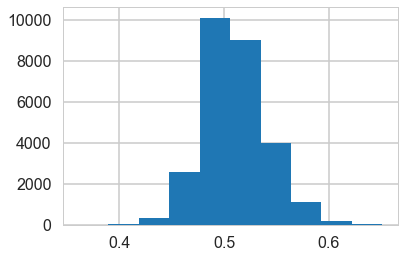

In [249]:
plt.hist(sent_probs)
plt.show()

In [250]:
NS_prediction = clf_NS.predict_proba(vected_sms_meyers)[:,0]
print('-.5=S and .5=N: ',(np.sum(NS_prediction)/len(NS_prediction)-Norm_NS))

-.5=S and .5=N:  -0.00103418117687


In [251]:
TF_prediction = clf_TF.predict_proba(vected_sms_meyers)[:,0]
print('-.5=T and .5=F: ',(np.sum(TF_prediction)/len(TF_prediction)-Norm_TF))

-.5=T and .5=F:  -0.0159578706103


In [252]:
JP_prediction = clf_JP.predict_proba(vected_sms_meyers)[:,0]
print('-.5=P and .5=J: ',(np.sum(JP_prediction)/len(JP_prediction)-Norm_JP))

-.5=P and .5=J:  0.00141852219472


__________________________________________________________________________________

In [253]:
#create a list of all the people who have texted me
People = []
for text in raw_texts['smses']['sms']:
    if ((text['@contact_name'] not in People) and int(text['@type'])!=2):
        People.append(text['@contact_name'])
        #print(text)
#print(People)

In [254]:
#collect all the texts from each of my contacts
from collections import defaultdict
raw_text_friends = defaultdict(list)
for person in People:
    for message in raw_texts['smses']['sms']:
        #only include texts that you have sent
        if ((int(message['@type'])!=2) and (message['@contact_name']==person) and (message['@body'] != '')):
            raw_text_friends[person].append(message['@body']) 
#print(raw_text_friends)
raw_text_series_friend = pd.Series(raw_text_friends)

In [255]:
#classify the average from each of my friends
from collections import defaultdict
friend_mbti_personalities = defaultdict(list)
for person in People:
    mbti_string = ''
    raw_text_series_friend = pd.Series(raw_text_friends[person])
    raw_text_series_friend = raw_text_series_friend.apply(cleanText)
    vected_sms_meyers = vectorizer_mtbi.transform(raw_text_series_friend)
    
    #IE_prediction = clf_IE.predict(vected_sms_meyers)
    IE_prediction = clf_IE.predict_proba(vected_sms_meyers)[:,0]
    if ((np.sum(IE_prediction)/len(IE_prediction))>Norm_IE):
        mbti_string = mbti_string +'I'
    else:
        mbti_string = mbti_string +'E'
        
    NS_prediction = clf_NS.predict_proba(vected_sms_meyers)[:,0]
    if ((np.sum(NS_prediction)/len(NS_prediction))>Norm_NS):
        mbti_string = mbti_string +'N'
    else:
        mbti_string = mbti_string +'S'
    
    TF_prediction = clf_TF.predict_proba(vected_sms_meyers)[:,0]
    if ((np.sum(TF_prediction)/len(TF_prediction))>Norm_TF):
        mbti_string = mbti_string +'F'
    else:
        mbti_string = mbti_string +'T'
        
    JP_prediction = clf_JP.predict_proba(vected_sms_meyers)[:,0]
    if ((np.sum(JP_prediction)/len(JP_prediction))>Norm_JP):
        mbti_string = mbti_string +'J'
    else:
        mbti_string = mbti_string +'P'  
        
    #print(person, ' is ',  mbti_string)
    #print(len(pd.Series(raw_text_friends[person])))
    friend_mbti_personalities[person].append(mbti_string)
    friend_mbti_personalities[person].append(len(pd.Series(raw_text_friends[person])))

In [256]:
#display each persons MBTI classification from their texts and the count of texts that it is based off of
pd.options.display.max_rows = 30
out = pd.DataFrame.from_dict(friend_mbti_personalities,orient='index')
out.columns = ['MBTI','Text_Count']
print(out.sort_values('Text_Count',ascending=False).reset_index(drop=True))#.reset_index(drop=True)) to hide names

     MBTI  Text_Count
0    ISTP       23055
1    ESTJ        3957
2    INTJ        1003
3    INTP         989
4    INTP         893
5    ENFP         636
6    ESFP         537
7    ESFP         508
8    INTJ         415
9    INFP         384
10   ISTP         354
11   ENFP         340
12   INTJ         290
13   INTJ         265
14   ISTJ         221
..    ...         ...
146  INFP           1
147  ESFP           1
148  INTJ           1
149  ISTJ           1
150  INTP           1
151  ISTP           1
152  ISFP           1
153  ISFJ           1
154  ISTJ           1
155  INTP           1
156  ESFP           1
157  ESTJ           1
158  INTP           1
159  INTJ           1
160  ISTP           1

[161 rows x 2 columns]


In [257]:
#show words that are the most polarized in introverted vs extroverted
words = np.array(vectorizer_mtbi.get_feature_names())

x = np.eye(xtest.shape[1])
#probs = clf_IE.predict_log_proba(x)[:, 0]
probs = clf_IE.predict_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:20]]
bad_words = words[ind[-20:]]

good_prob = probs[ind[:20]]
bad_prob = probs[ind[-20:]]

print("Introverted words\t     P(Introverted | Extroverted)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1-p))
    
print("Extroverted words\t     P(Introverted | Extroverted)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1-p))

Introverted words	     P(Introverted | Extroverted)
                rain 0.64
                 sky 0.63
               loner 0.62
          melancholy 0.62
               linux 0.62
           existence 0.61
               dream 0.61
         overwhelmed 0.61
            solitude 0.61
               lucid 0.61
            daydream 0.61
              lyrics 0.61
             destiny 0.61
               quiet 0.61
               latin 0.61
           aspergers 0.60
             stephen 0.60
                rant 0.60
            movement 0.60
                cats 0.60
Extroverted words	     P(Introverted | Extroverted)
                 nts 0.39
                 dat 0.39
                  yo 0.39
         instinctual 0.39
                 que 0.39
                 don 0.39
                 omg 0.39
              reddit 0.39
                  du 0.39
              hahaha 0.38
                mate 0.37
              bubbly 0.37
                  ll 0.37
            charming 0.37
            

In [259]:
#dont show
#show words that are the most polarized in introverted vs extroverted
postings_raw = list(raw_text_friends.values())
import itertools
postings = np.array(list(itertools.chain.from_iterable(postings_raw)))

sent_probs = clf_IE.predict_proba(vectorizer_mtbi.transform(postings))[:, 0]
indes_sent = np.argsort(sent_probs)

good_words = postings[indes_sent[:20]]
bad_words = postings[indes_sent[-20:]]

good_prob = sent_probs[indes_sent[:20]]
bad_prob = sent_probs[indes_sent[-20:]]

print("Introverted Sentences\t     P(Introverted | Extroverted)")
for w, p in zip(good_words, good_prob):
    print("{:.2f}".format(1-p),"{:>20}".format(w))

print("")
print("_____________________________________________")
print("")
    
print("Extroverted Sentences\t     P(Introverted | Extroverted)")
for w, p in zip(bad_words, bad_prob):
    print("{:.2f}".format(1-p),"{:>20}".format(w))

SyntaxError: invalid syntax (<ipython-input-259-afbd07c899cc>, line 1)